<a href="https://colab.research.google.com/github/Elian19-01/Massive-data/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MASSIVE DATA MANAGEMENT**
##Data 5A
##Project U2
##Elian Jared Vega Mugarte

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import these libraries in order to be able
#to plot the tables

In [2]:
#downloading and installing a library to be able to link with our google cloud account
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.cloud import bigquery
client = bigquery.Client(project='micro-geode-354712')

## How Many Tables are there?

In [5]:
qr_df = ("""SELECT * FROM `gdp`.__TABLES__;""")
df_01 = client.query(qr_df).to_dataframe()
print("Number of tables: ", len(df_01))

Number of tables:  10


###What are the tables names?




In [6]:
print("Table names: ")
for i in df_01['table_id']:
  print(i)

Table names: 
domestic_demand_forecast
gross_domestic_product
investment_by_asset
investment_by_sector
investment_forecast
investment_gfcf
nominal_gdp_forecast
quarterly_gdp
real_gdp_forecast
real_gdp_long_term_forecast


In [9]:
#Replace 'dataset_name' with your actual dataset name
#Replace 'table_name' with the name of the table you want to query
sql_qr2 = ("""
select count(*) as Number_of_rows from `gdp.gross_domestic_product` limit 10""")
df_gdp_rows = client.query(sql_qr2).to_dataframe()
df_gdp_rows.head()

,Number_of_rows
0,5763264


### How many rows are in “investment_forecast”?

In [10]:
#Replace 'dataset_name' with your actual dataset name
#Replace 'table_name' with the name of the table you want to query
sql_qr2 = ("""
select count(*) as Number_of_rows from `gdp.investment_forecast` limit 10""")
df_iv = client.query(sql_qr2).to_dataframe()
df_iv.head()

,Number_of_rows
0,16143463


### How many years of data are in the table “gross_domestic_product”?Print them in a sorted fashion

In [19]:
#Replace 'dataset_name' with your actual dataset name
#Replace 'table_name' with the name of the table you want to query
sql_qr2 = ("""
select distinct TIME_Code from `gdp.gross_domestic_product` order by TIME_Code""")
df_gdp = client.query(sql_qr2).to_dataframe()
print("Years of data: ", len(df_gdp))
df_gdp

Years of data:  62


,TIME_Code
0,1960
1,1961
2,1962
3,1963
4,1964
...,...
57,2017
58,2018
59,2019
60,2020


#### Write a query to get the Year, average GDP from gross_domestic_productfrom the country Mexico. Order by year in ascending order.

In [20]:
sql_qr2 = ("""
select TIME_Code, avg(Value) Avg_Value  
from `gdp.gross_domestic_product` where Country = 'Mexico'
group by TIME_Code
order by TIME_Code """)
df_4 = client.query(sql_qr2).to_dataframe()
df_4.head(10)#top 10

,TIME_Code,Avg_Value
0,1970,47954.704083
1,1971,52453.496775
2,1972,59330.077705
3,1973,67804.824030
4,1974,78380.176823
5,1975,90400.590812
6,1976,99370.745719
7,1977,109129.305341
8,1978,126387.122382
9,1979,149342.481105


#### Save the query and then use the Explore Data and the explore data with data studio andmake a graphic X = Year, Y = Average GDP sorted in ascending order by Year.

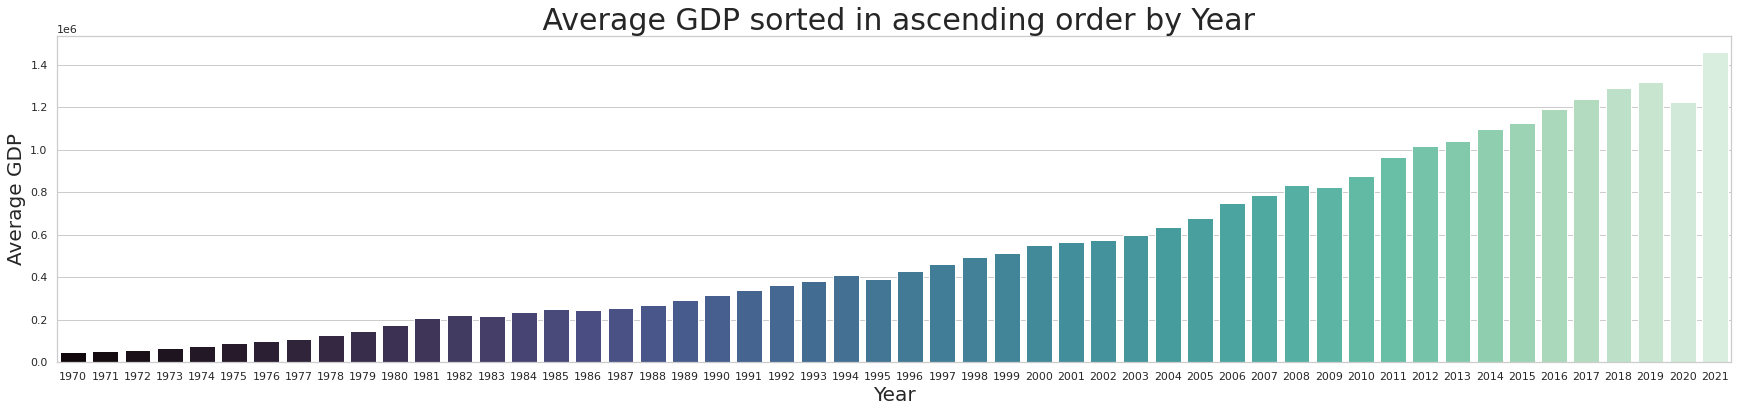

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(30,6))
p = sns.barplot(x = "TIME_Code", y = "Avg_Value", data = df_4, palette="mako")
p.set_xlabel("Year", fontsize = 20)
p.set_ylabel("Average GDP", fontsize = 20)
p.set_title(" Average GDP sorted in ascending order by Year", size= 30)
plt.show()

### Now Write a query to get the Year, average GDP from gross_domestic_productfrom all countries.Group by Country andOrder by Average GDPin ascending order.
####Save the query and then use the Explore Data and the explore data with data studio andmake a graphic X = Country, Y = Average GDP sorted in ascending order by Year.

In [22]:
sql_qr2 = ("""
select Country, TIME_Code, Value  
from `gdp.gross_domestic_product`
where TIME_Code = "2020" """)
df = client.query(sql_qr2).to_dataframe()
df_5 = df.groupby(["Country"])["Value"].mean().sort_values(ascending=False).to_frame()
df_5.reset_index(inplace=True)

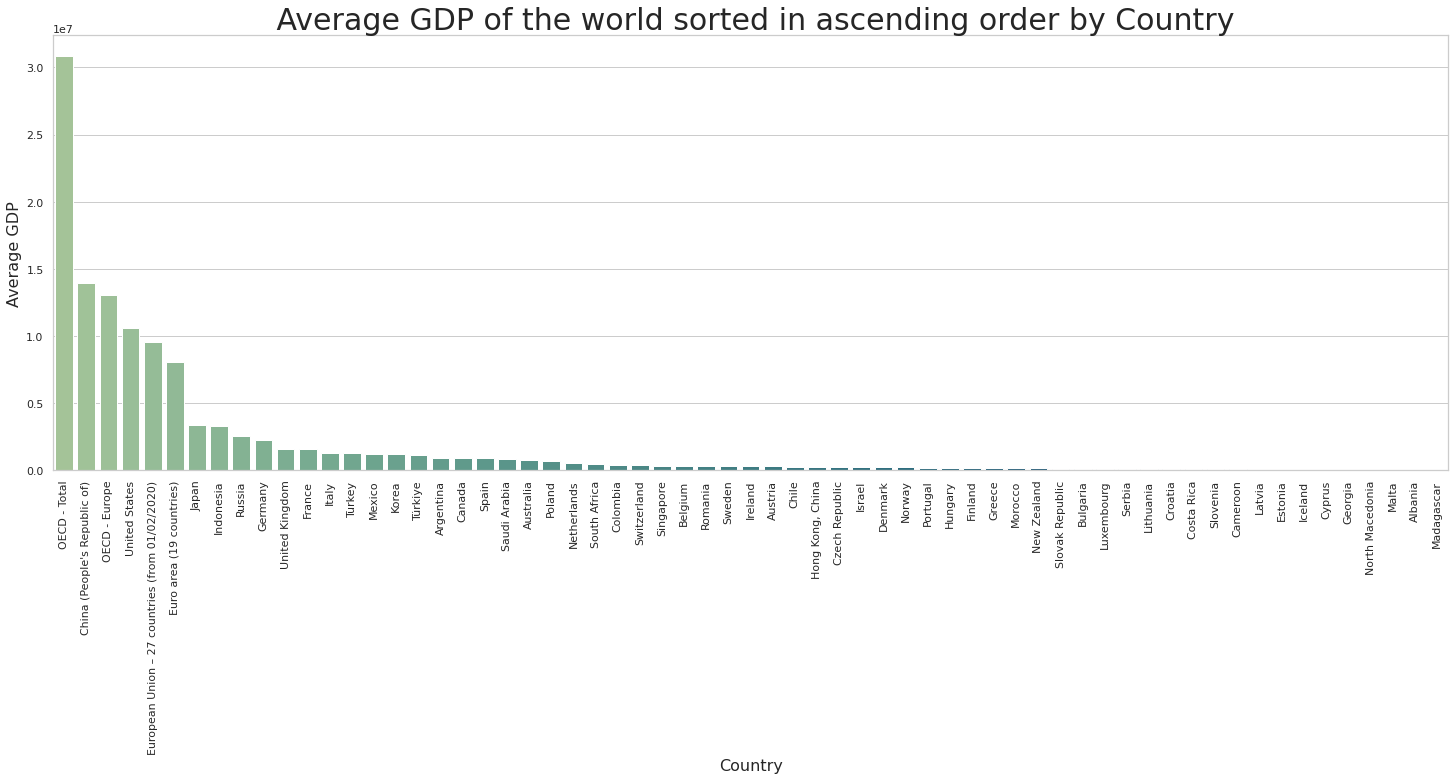

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,8))
p = sns.barplot(x = "Country", y = "Value", data = df_5, palette="crest")
p.set_xlabel("Country", fontsize = 16)
p.set_ylabel("Average GDP", fontsize = 16)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
p.set_title(" Average GDP of the world sorted in ascending order by Country", size= 30)
plt.show()